# CS 412, Homework 1, Wenke Huang (whuang67)

### Question 1

In [1]:
# Question 1
# 1
# a
import pandas as pd
import numpy as np
scores = pd.read_csv("scores.txt", sep = "\t", header = None, names = ["midterm", "final"], index_col = 0)
print "1.(a)\nThe min of midterm scores is {}.".format(np.min(scores.midterm))
print "The max of midterm scores is {}.".format(np.max(scores.midterm))

1.(a)
The min of midterm scores is 37.
The max of midterm scores is 100.


The 'min' stands for the minimun value of the whole points while the 'max' stands for the maximum value.

In [2]:
# b
print "(b)\nThe Q1 (25th percentile) of midterm scores is {}.".format(scores.midterm.quantile(q = .25))
print "The Median (Q2 or 50th percentile) of midterm scores is {}.".format(np.median(scores.midterm))
print "The Q3 (75th percentile) of midterm scores is {}.".format(scores.midterm.quantile(q = .75))

(b)
The Q1 (25th percentile) of midterm scores is 68.0.
The Median (Q2 or 50th percentile) of midterm scores is 77.0.
The Q3 (75th percentile) of midterm scores is 87.0.


The Median stands for the middle value if odd number of values, or average of the middle two values otherwise. The Q1 and Q3 stand for 25th and 75th percentile, respectively. What's more, the value of Q3-Q1 is also called Inter-quantile range which can be used to help find out the outliers.

In [3]:
# c
print "(c)\nThe Mean of midterm scores is {:.2f}.".format(scores.midterm.mean())
print "The Standard Deviation of midterm scores is {:.2f}.".format(scores.midterm.std())

(c)
The Mean of midterm scores is 76.68.
The Standard Deviation of midterm scores is 13.17.


The Mean helps us measure the central tendency, and can be calculated by $\mu = \frac{1}{n}\sum_{i=1}^{n} x_i$. The Standard Deviation measures how far a set of numbers are spread out from the Mean, and is the square root of Variance which can be calculated by $s^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_i-\bar{x})^2$.

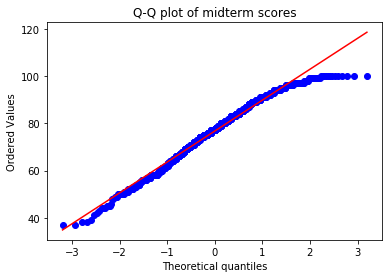

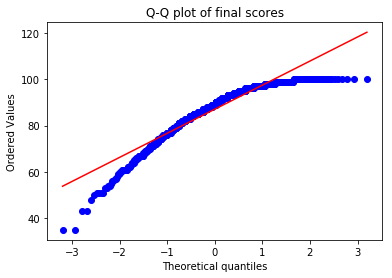

In [4]:
# 2
import scipy.stats as ss
import pylab
ss.probplot(scores.midterm, dist = "norm", plot = pylab)
pylab.title("Q-Q plot of midterm scores")
pylab.show()
ss.probplot(scores.final, dist = "norm", plot = pylab)
pylab.title("Q-Q plot of final scores")
pylab.show()

The minimum of the final scores are slightly less than the minimum value of the midterm score. The maximum value of the final scores are equal to the maximum value of the midterm score which are both 100. Also, all the Q1, Median, and Q3 of the final score look greater than the corresponding values of the midterm, and we can know their actual values to be 82, 89, and 96, respectively after calculating.

We think that the midterm scores tend to be lower than the final scores.

### Question 2

In [5]:
# Question 2
# 1
Jaccard_coef = float(107)/(107+19+31)
print "1.\nThe Jaccard coefficient of J Sainsbury and King Kullen is {:.2f}.".format(Jaccard_coef)

1.
The Jaccard coefficient of J Sainsbury and King Kullen is 0.68.


The Jaccard coefficient is calculated as $\frac{107}{107+19+31} = 0.68.$

In [6]:
# 2
inventories = pd.read_csv("inventories.txt", sep = "\t", header = "infer", index_col = 0)
import scipy.spatial.distance as ssd
Minkowski_d_1 = ssd.minkowski(inventories[:1], inventories[1:2], 1)
Minkowski_d_2 = ssd.minkowski(inventories[:1], inventories[1:2], 2)
Minkowski_d_Inf = ssd.minkowski(inventories[:1], inventories[1:2], float("inf"))
print "2.(a)\nWhen h = 1, the Minkowski distance is {}.".format(Minkowski_d_1)
print "(b)\nWhen h = 2, the Minkowski distance is {:.2f}.".format(Minkowski_d_2)
print "(c)\nWhen h = Infinity, the Minkowski distance is {}.".format(Minkowski_d_Inf)

2.(a)
When h = 1, the Minkowski distance is 5700.0.
(b)
When h = 2, the Minkowski distance is 695.95.
(c)
When h = Infinity, the Minkowski distance is 166.0.


The Minkowski distance can be calculated by $(|x_{i1}-x_{j1}|^h + |x_{i2}-x_{j2}|^h + ... + |x_{il}-x_{jl}|^h)^{1/h}$. When h = 1, it is Manhattan distance. When h = 2, it is Euclidean distance. When h is Infinity, it is "supremum" distance which is $\text{max }|x_{if} - x_{jf}|$.

In [7]:
# 3
print "3.\nThe cosine similarity between J Sainsbury and King Kullen is {:.2f}.".format(1-ssd.cosine(inventories[0:1],
                                                                                                     inventories[1:2]))

3.
The cosine similarity between J Sainsbury and King Kullen is 0.84.


Cosine measure can help us measure the similarity of two vectors. $cos(d_1, d_2) = \frac{d_1\cdot d_2}{||d_1||\times||d_2||}$, where $\cdot$ indicates vector dot product and $||d_i||$ is the length of the vector i.

### Question 3

In [8]:
# Question 3
# 1
scores_norm_midterm = (scores.midterm - np.mean(scores.midterm))/np.std(scores.midterm)
print "1.\nThe Mean and Std before normalization which we have calculated are {:.2f} and {:.2f}, respectively.".format(
    scores.midterm.mean(), scores.midterm.std())
print "The Mean and Std after normalization are {:.2f} and {:.2f}, respectively.".format(
    np.mean(scores_norm_midterm), np.std(scores_norm_midterm))

1.
The Mean and Std before normalization which we have calculated are 76.68 and 13.17, respectively.
The Mean and Std after normalization are 0.00 and 1.00, respectively.


The normalized value of $X_i$ is calculated as $Z_i = \frac{X_i - \bar{X}}{S}$, where $\bar{X}$ and $S$ indicate Mean and Standard Deviation, respectively.

In [9]:
# 2
print "\n2.After transformation, the corresponding score of 90 is {:.2f}.".format(
    (90-scores.midterm.mean())/scores.midterm.std())


2.After transformation, the corresponding score of 90 is 1.01.
